<a href="https://colab.research.google.com/github/mgalao/deep-learning-project/blob/main/project/DL_Models_from_scratch_carolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## 1.1 Connect Google Drive

In [1]:
from google.colab import drive

In [2]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

# # Change to the directory where project is located
# os.chdir('/content/drive/MyDrive/College/MSc/2nd Semester/Deep Learning/project')

# Change to the directory where project is located
os.chdir('/content/drive/MyDrive/FACULDADE/mestrado/')

# # Verify that we changed the directory
print("Changed directory to:", os.getcwd())

Changed directory to: /content/drive/MyDrive/FACULDADE/mestrado


## 1.2 Import Libraries

In [5]:
pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 39.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import zipfile
import pickle
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


from classes import *
from functions import *

In [7]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.metrics import AUC, F1Score, CategoricalAccuracy, TopKCategoricalAccuracy
from sklearn.metrics import f1_score, precision_score, recall_score
from keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Dropout, Concatenate, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import pandas as pd
from IPython.display import display
import tensorflow.keras.backend as K
import gc
from tensorflow.keras.layers import ReLU


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Import Dataset

In [8]:
# #Load the DataFrames from the .pkl files
# with open("../data/train_df.pkl", "rb") as f:
#      train_df = pickle.load(f)

# with open("../data/val_df.pkl", "rb") as f:
#      val_df = pickle.load(f)

# with open("../data/test_df.pkl", "rb") as f:
#      test_df = pickle.load(f)

# with open("../data/train_df_sampled.pkl", "rb") as f:
#      train_df_sampled = pickle.load(f)

# with open("../data/family_encoder.pkl", "rb") as f:
#      family_encoder = pickle.load(f)

In [9]:
# FOR COLLAB
# Load the DataFrames from the .pkl files
with open("data/train_df.pkl", "rb") as f:
     train_df = pickle.load(f)

with open("data/val_df.pkl", "rb") as f:
     val_df = pickle.load(f)

with open("data/test_df.pkl", "rb") as f:
     test_df = pickle.load(f)

with open("data/train_df_sampled.pkl", "rb") as f:
     train_df_sampled = pickle.load(f)

with open("data/family_encoder.pkl", "rb") as f:
     family_encoder = pickle.load(f)

<div class="alert alert-block alert-success">

# **2.** Preprocessing

<div>

- Normalizes pixel values (e.g., rescaling from [0,255] to [0,1]).
- Resizes images to a fixed size (e.g., 224x224 pixels).
- Applies augmentation (only during training).
- Converts images to batches (e.g., batch_size=32 loads 32 images at a time).

In [10]:
minority_class = train_df['family'].value_counts()[train_df['family'].value_counts() < 25].index
minority_class=minority_class.to_list()

In [11]:
# batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
# image_size = (224, 224)

# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment='mixup', oversampling=True, shuffle=True)
# train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment='medium', oversampling=True, shuffle=True)
# val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
# test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

In [12]:
# num_images = 32 ##
# rows, cols = 8, 4 ##

# plot_batch(train_ds, class_names=class_names, num_images=num_images, rows=rows, cols=cols)

## (augmentations)

In [13]:
# augmentations_to_test = [
#     # "none",
#     # "light",
#     # "medium",
#     # "heavy",
#     # "grayscale",
#     # "randaugment",
#     "mixup",
#     "cutmix"]

<!-- ##### Simple model do test augmentations -->

In [14]:
# def build_model(num_classes):
#     base = keras.applications.EfficientNetB0(
#         input_shape=(224, 224, 3),
#         include_top=False,
#         weights="imagenet",
#         pooling="avg"
#     )
#     base.trainable = False  # You can fine-tune later

#     inputs = keras.Input(shape=(224, 224, 3))
#     x = base(inputs, training=False)
#     x = keras.layers.Dropout(0.2)(x)
#     outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

#     return keras.Model(inputs, outputs)

In [15]:
# def sample_dataset(dataset, fraction=None, num_batches=None, seed=42):
#     """Return a sampled subset of the dataset."""
#     if fraction:
#         dataset = dataset.shuffle(1000, seed=seed)
#         dataset = dataset.take(int(fraction * tf.data.experimental.cardinality(dataset).numpy()))
#     elif num_batches:
#         dataset = dataset.take(num_batches)
#     return dataset

<!-- ##### Loop -->

In [16]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=5,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


In [17]:
# augmentations_to_test = [
#     "none",
#     "light",
#     "medium",
#     "heavy",
#     "grayscale",
#     "randaugment",
#     "mixup",
#     "cutmix"]

In [18]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=15,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


<div class="alert alert-block alert-success">

# **3.** Parameters

<div>

In [19]:
# Add callbacks
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    ,EarlyStopping(patience=7, restore_best_weights=True, monitor="val_loss", verbose=1)
]

In [20]:
metrics = [
    CategoricalAccuracy(name="accuracy"),
    AUC(name="auc"),
    F1Score(average="macro", name="f1_macro"),
    F1Score(average="weighted", name="f1_weighted"),
    TopKCategoricalAccuracy(k=5, name="top5_accuracy")
]

In [21]:
augmentations_to_test = [
    "none",
    "light",
    "mixup",
    "medium",
    "heavy",
    "grayscale_plus",
    "randaugment",
    ]

<div class="alert alert-block alert-success">

# **4.** Models

<div>

## DenseNet - No Oversampling

In [ ]:

def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


In [ ]:
# Initialize the preprocessor
batch_size = 32
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_densenet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    if aug=="grayscale_plus":
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment='grayscale', oversampling=False)
    else:
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds,
        val_ds=val_ds,
        experiment_name=f"densenet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=30)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    train_eval = model.evaluate(train_ds, verbose=0)
    val_eval = model.evaluate(val_ds, verbose=0)

    metric_names = ["loss", "accuracy", "auc", "f1_macro", "f1_weighted", "top5_accuracy"]

    train_metrics = dict(zip(metric_names, train_eval))
    val_metrics = dict(zip(metric_names, val_eval))

    # Results
    results[aug] = {
        "train_loss": train_metrics["loss"],
        "val_loss": val_metrics["loss"],

        "train_accuracy": train_metrics["accuracy"],
        "val_accuracy": val_metrics["accuracy"],

        "train_f1_macro": train_metrics.get("f1_macro"),
        "val_f1_macro": val_metrics.get("f1_macro"),

        "val_f1_weighted": val_metrics.get("f1_weighted")
    }

In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['train_accuracy', 'val_accuracy']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Accuracy Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# # Initialize the preprocessor
# batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
# image_size = (224, 224)

# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     model = build_densenet()

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         metrics=metrics
#     )

#     train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
#     train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
#     val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
#     test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

#     # Initialize the experiment
#     experiment = Experiment(
#         model=model,
#         train_ds=train_ds_sampled,
#         val_ds=val_ds,
#         experiment_name=f"densenet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
#         batch_size=32,
#         image_size=(224, 224),
#         save_model = False
#     )

#     # Run the experiment
#     history = experiment.run_experiment(callbacks=callbacks, epochs=40)

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")

#     # Clear memory to avoid OOM
#     del model
#     del experiment
#     K.clear_session()
#     gc.collect()


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## DenseNet 2 - With Oversampling

In [ ]:

def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 56, 56,    │     18,464 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 56, 56,    │     27,680 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ concatenate_1[0]

 Total params: 817,922 (3.12 MB)

 Trainable params: 811,810 (3.10 MB)

 Non-trainable params: 6,112 (23.88 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_densenet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    if aug=="grayscale_plus":
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment='grayscale', oversampling=False)
    else:
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds,
        val_ds=val_ds,
        experiment_name=f"densenet_with_{aug}_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=30)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    train_eval = model.evaluate(train_ds, verbose=0)
    val_eval = model.evaluate(val_ds, verbose=0)

    metric_names = ["loss", "accuracy", "auc", "f1_macro", "f1_weighted", "top5_accuracy"]

    train_metrics = dict(zip(metric_names, train_eval))
    val_metrics = dict(zip(metric_names, val_eval))

    # Results
    results[aug] = {
        "train_loss": train_metrics["loss"],
        "val_loss": val_metrics["loss"],

        "train_accuracy": train_metrics["accuracy"],
        "val_accuracy": val_metrics["accuracy"],

        "train_f1_macro": train_metrics.get("f1_macro"),
        "val_f1_macro": val_metrics.get("f1_macro"),

        "val_f1_weighted": val_metrics.get("f1_weighted")
    }


Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 90s 149ms/step - accuracy: 0.0285 - auc: 0.6050 - f1_macro: 0.0056 - f1_weighted: 0.0120 - loss: 5.4695 - top5_accuracy: 0.0989 - val_accuracy: 0.0373 - val_auc: 0.6489 - val_f1_macro: 0.0054 - val_f1_weighted: 0.0134 - val_loss: 5.2895 - val_top5_accuracy: 0.1252 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.0514 - auc: 0.6916 - f1_macro: 0.0139 - f1_weighted: 0.0271 - loss: 5.0577 - top5_accuracy: 0.1519 - val_accuracy: 0.0540 - val_auc: 0.6826 - val_f1_macro: 0.0138 - val_f1_weighted: 0.0232 - val_loss: 5.0897 - val_top5_accuracy: 0.1692 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0630 - auc: 0.7407 - f1_macro: 0.0238 - f1_weighted: 0.0381 - loss: 4.8120 - top5_accuracy: 0.1977 - val_accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: light
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 117s 240ms/step - accuracy: 0.0472 - auc: 0.6434 - f1_macro: 0.0167 - f1_weighted: 0.0295 - loss: 5.4679 - top5_accuracy: 0.1388 - val_accuracy: 0.0273 - val_auc: 0.5945 - val_f1_macro: 0.0030 - val_f1_weighted: 0.0100 - val_loss: 6.5941 - val_top5_accuracy: 0.0935 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0548 - auc: 0.6959 - f1_macro: 0.0152 - f1_weighted: 0.0290 - loss: 5.0112 - top5_accuracy: 0.1620 - val_accuracy: 0.0390 - val_auc: 0.6536 - val_f1_macro: 0.0065 - val_f1_weighted: 0.0189 - val_loss: 5.6280 - val_top5_accuracy: 0.1224 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0679 - auc: 0.7398 - f1_macro: 0.0251 - f1_weighted: 0.0400 - loss: 4.8009 - top5_accuracy: 0.1868 - val_accu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.0463 - auc: 0.6109 - f1_macro: 0.0179 - f1_weighted: 0.0277 - loss: 5.5215 - top5_accuracy: 0.1309 - val_accuracy: 0.0334 - val_auc: 0.6054 - val_f1_macro: 0.0025 - val_f1_weighted: 0.0112 - val_loss: 7.5946 - val_top5_accuracy: 0.1096 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0522 - auc: 0.6305 - f1_macro: 0.0074 - f1_weighted: 0.0171 - loss: 5.1687 - top5_accuracy: 0.1496 - val_accuracy: 0.0401 - val_auc: 0.6333 - val_f1_macro: 0.0052 - val_f1_weighted: 0.0187 - val_loss: 7.9011 - val_top5_accuracy: 0.1141 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0619 - auc: 0.6501 - f1_macro: 0.0120 - f1_weighted: 0.0232 - loss: 5.0524 - top5_accuracy: 0.1682 - val_accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: medium
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 123s 254ms/step - accuracy: 0.0640 - auc: 0.6638 - f1_macro: 0.0289 - f1_weighted: 0.0429 - loss: 5.4961 - top5_accuracy: 0.1625 - val_accuracy: 0.0328 - val_auc: 0.6641 - val_f1_macro: 0.0047 - val_f1_weighted: 0.0097 - val_loss: 5.2354 - val_top5_accuracy: 0.1308 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0493 - auc: 0.6835 - f1_macro: 0.0126 - f1_weighted: 0.0252 - loss: 5.0639 - top5_accuracy: 0.1532 - val_accuracy: 0.0473 - val_auc: 0.6329 - val_f1_macro: 0.0143 - val_f1_weighted: 0.0205 - val_loss: 5.4859 - val_top5_accuracy: 0.1219 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0630 - auc: 0.7262 - f1_macro: 0.0200 - f1_weighted: 0.0353 - loss: 4.8704 - top5_accuracy: 0.1827 - val_acc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: heavy
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 125s 261ms/step - accuracy: 0.0429 - auc: 0.6366 - f1_macro: 0.0128 - f1_weighted: 0.0238 - loss: 5.5085 - top5_accuracy: 0.1256 - val_accuracy: 0.0362 - val_auc: 0.6229 - val_f1_macro: 0.0048 - val_f1_weighted: 0.0143 - val_loss: 5.4059 - val_top5_accuracy: 0.1119 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0389 - auc: 0.6760 - f1_macro: 0.0083 - f1_weighted: 0.0186 - loss: 5.1063 - top5_accuracy: 0.1398 - val_accuracy: 0.0562 - val_auc: 0.6482 - val_f1_macro: 0.0073 - val_f1_weighted: 0.0213 - val_loss: 5.2119 - val_top5_accuracy: 0.1425 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0517 - auc: 0.7128 - f1_macro: 0.0134 - f1_weighted: 0.0267 - loss: 4.9332 - top5_accuracy: 0.1631 - val_accu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 114s 236ms/step - accuracy: 0.0491 - auc: 0.6441 - f1_macro: 0.0203 - f1_weighted: 0.0307 - loss: 5.5267 - top5_accuracy: 0.1399 - val_accuracy: 0.0189 - val_auc: 0.5567 - val_f1_macro: 6.4173e-04 - val_f1_weighted: 0.0022 - val_loss: 5.9653 - val_top5_accuracy: 0.0662 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 68s 76ms/step - accuracy: 0.0426 - auc: 0.6518 - f1_macro: 0.0080 - f1_weighted: 0.0170 - loss: 5.1893 - top5_accuracy: 0.1224 - val_accuracy: 0.0367 - val_auc: 0.6172 - val_f1_macro: 0.0054 - val_f1_weighted: 0.0176 - val_loss: 5.4087 - val_top5_accuracy: 0.1119 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0483 - auc: 0.6836 - f1_macro: 0.0102 - f1_weighted: 0.0198 - loss: 5.0573 - top5_accuracy: 0.13

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: randaugment
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 103s 198ms/step - accuracy: 0.0330 - auc: 0.6105 - f1_macro: 0.0085 - f1_weighted: 0.0174 - loss: 5.5949 - top5_accuracy: 0.1059 - val_accuracy: 0.0301 - val_auc: 0.6310 - val_f1_macro: 0.0023 - val_f1_weighted: 0.0103 - val_loss: 5.2756 - val_top5_accuracy: 0.0952 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0355 - auc: 0.6270 - f1_macro: 0.0056 - f1_weighted: 0.0147 - loss: 5.2869 - top5_accuracy: 0.1111 - val_accuracy: 0.0356 - val_auc: 0.6792 - val_f1_macro: 0.0058 - val_f1_weighted: 0.0146 - val_loss: 5.2697 - val_top5_accuracy: 0.1491 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0453 - auc: 0.6650 - f1_macro: 0.0084 - f1_weighted: 0.0184 - loss: 5.1408 - top5_accuracy: 0.1302 - va

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['train_accuracy', 'val_accuracy']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Accuracy Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# # Initialize the preprocessor
# batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
# image_size = (224, 224)

# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     model = build_densenet()

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         metrics=metrics
#     )

#     train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
#     train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
#     val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
#     test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

#     # Initialize the experiment
#     experiment = Experiment(
#         model=model,
#         train_ds=train_ds_sampled,
#         val_ds=val_ds,
#         experiment_name=f"densenet_with_{aug}_oversampling", # MUDAR NOME!!!!!!!!!!!!
#         batch_size=32,
#         image_size=(224, 224),
#         save_model = False
#     )

#     # Run the experiment
#     history = experiment.run_experiment(callbacks=callbacks, epochs=40)

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")

#     # Clear memory to avoid OOM
#     del model
#     del experiment
#     K.clear_session()
#     gc.collect()


In [ ]:
# # Convert results to a DataFrame
# results_df = pd.DataFrame.from_dict(results, orient='index')
# results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# # Display the table
# display(results_df.round(4))


In [ ]:
# # Melt the DataFrame for seaborn plotting
# metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
# melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
#                             var_name='metric', value_name='value')

# # Plot using seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
# plt.title("Comparison of Metrics Across Augmentation Strategies")
# plt.ylim(0, 0.4)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

## Testing DenseNet different architectures

In [ ]:
# import os
# import numpy as np
# import tensorflow as tf
# from sklearn.metrics import f1_score, precision_score, recall_score
# import pandas as pd

# # DenseNet components (bottleneck always included)
# def dense_layer(x, growth_rate):
#     out = tf.keras.layers.BatchNormalization()(x)
#     out = tf.keras.layers.ReLU()(out)
#     out = tf.keras.layers.Conv2D(4 * growth_rate, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(out)
#     out = tf.keras.layers.BatchNormalization()(out)
#     out = tf.keras.layers.ReLU()(out)
#     out = tf.keras.layers.Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(out)
#     x = tf.keras.layers.Concatenate()([x, out])
#     return x

# def dense_block(x, num_layers, growth_rate):
#     for _ in range(num_layers):
#         x = dense_layer(x, growth_rate)
#     return x

# def transition_layer(x, compression=0.5):
#     filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
#     x = tf.keras.layers.Conv2D(filters, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
#     x = tf.keras.layers.AveragePooling2D((2, 2), strides=2)(x)
#     return x

# def build_densenet(input_shape=(224, 224, 3),
#                    num_classes=202,
#                    block_layers=[6, 12, 24, 16],
#                    growth_rate=32,
#                    compression=0.5,
#                    dropout_rate=0.0):
#     inputs = tf.keras.Input(shape=input_shape)
#     x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(inputs)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
#     x = tf.keras.layers.AveragePooling2D((3, 3), strides=2, padding='same')(x)

#     for i, num_layers in enumerate(block_layers):
#         x = dense_block(x, num_layers, growth_rate)
#         if i < len(block_layers) - 1:
#             x = transition_layer(x, compression)

#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     if dropout_rate > 0:
#         x = tf.keras.layers.Dropout(dropout_rate)(x)
#     outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

#     return tf.keras.Model(inputs, outputs)

# # Define model variants - dropmout, learog rate, lqbel somothing, 30 ecpochs, callbacks
# def build_densenet_light():
#     return build_densenet(block_layers=[4, 4, 4, 4], growth_rate=12, compression=0.5, dropout_rate=0.0)

# def build_densenet_medium():
#     return build_densenet(block_layers=[6, 12, 8, 6], growth_rate=24, compression=0.5, dropout_rate=0.3)

# def build_densenet_heavy():
#     return build_densenet(block_layers=[6, 12, 24, 16], growth_rate=32, compression=0.8, dropout_rate=0.5)

# # Prepare model builders
# densenet_models = {
#     "densenet_light": build_densenet_light,
#     "densenet_medium": build_densenet_medium,
#     "densenet_heavy": build_densenet_heavy,
# }

# # Hyperparameters
# batch_size = 32
# image_size = (224, 224)
# all_results = []

# # Data and callbacks should be defined outside (placeholders here)
# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# # Loop to train each variant
# for arch_name, build_fn in densenet_models.items():
#     print(f"\nTraining architecture: {arch_name}")
#     model = build_fn()
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#         loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
#         metrics=metrics
#     )

#     train_ds, class_names = preprocess.load_img(
#         data_dir="data/rare_species/train",
#         minority_class=minority_class,
#         augment="mixup",
#         oversampling=True,
#         shuffle=True
#     )

#     val_ds, _ = preprocess.load_img(
#         data_dir="data/rare_species/val",
#         minority_class=minority_class,
#         augment=None,
#         oversampling=False
#     )

#     experiment = Experiment(
#         model=model,
#         train_ds=train_ds,
#         val_ds=val_ds,
#         experiment_name=f"{arch_name}",
#         batch_size=batch_size,
#         image_size=image_size,
#         save_model=False
#     )

#     history = experiment.run_experiment(callbacks=callbacks, epochs=30)

#     val_losses = history.history["val_loss"]
#     best_epoch = np.argmin(val_losses) + 1

#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     train_eval = model.evaluate(train_ds, verbose=0)
#     val_eval = model.evaluate(val_ds, verbose=0)

#     metric_names = ["loss", "accuracy", "auc", "top5_accuracy"]
#     train_metrics = dict(zip(metric_names, train_eval))
#     val_metrics = dict(zip(metric_names, val_eval))

#     all_results.append({
#         "architecture": arch_name,
#         "best epoch": best_epoch,
#         "train_loss": train_metrics["loss"],
#         "val_loss": val_metrics["loss"],
#         "train_accuracy": train_metrics["accuracy"],
#         "val_accuracy": val_metrics["accuracy"],
#         "val_f1_macro": f1_macro,
#         "val_f1_weighted": f1_weighted,
#         "val_precision": precision,
#         "val_recall": recall
#     })

# # Show results as DataFrame
# results_df = pd.DataFrame(all_results)
# print(results_df.round(4))



Training architecture: densenet_light
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
350/350 ━━━━━━━━━━━━━━━━━━━━ 1005s 3s/step - accuracy: 0.0135 - auc: 0.5408 - f1_macro: 0.0019 - f1_weighted: 0.0036 - loss: 5.4445 - top5_accuracy: 0.0585 - val_accuracy: 0.0200 - val_auc: 0.6091 - val_f1_macro: 0.0023 - val_f1_weighted: 0.0074 - val_loss: 5.3124 - val_top5_accuracy: 0.1096 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 1.
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training architecture: densenet_medium
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
350/350 ━━━━━━━━━━━━━━━━━━━━ 185s 252ms/step - accuracy: 0.0339 - auc: 0.5778 - f1_macro: 0.0042 - f1_weighted: 0.0123 - loss: 5.9029 - top5_accuracy: 0.1054 - val_accuracy: 0.0184 - val_auc: 0.5967 - val_f1_macro: 0.0015 - val_f1_weighted: 0.0065 - val_loss: 5.8440 - val_top5_accuracy: 0.0824 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 1.
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training architecture: densenet_heavy
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
350/350 ━━━━━━━━━━━━━━━━━━━━ 337s 463ms/step - accuracy: 0.0341 - auc: 0.5839 - f1_macro: 0.0065 - f1_weighted: 0.0155 - loss: 7.0479 - top5_accuracy: 0.1044 - val_accuracy: 0.0184 - val_auc: 0.5734 - val_f1_macro: 9.7968e-04 - val_f1_weighted: 0.0037 - val_loss: 7.1256 - val_top5_accuracy: 0.0740 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 1.
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      architecture  best epoch  train_loss  val_loss  train_accuracy  \
0   densenet_light           1      5.3915    5.3124          0.0141   
1  densenet_medium           1      5.9831    5.8440          0.0154   
2   densenet_heavy           1      7.2905    7.1256          0.0170   

   val_accuracy  val_f1_macro  val_f1_weighted  val_precision  val_recall  
0        0.0200        0.0023           0.0074         0.0064      0.0200  
1        0.0184        0.0015           0.0065         0.0088      0.0184  
2        0.0184        0.0010           0.0037         0.0023      0.0184  


In [ ]:
# results_df = pd.DataFrame(all_results)
# results_df = results_df.sort_values(by="val_f1_macro", ascending=False).reset_index(drop=True)
# display(results_df.round(4))

,architecture,best epoch,train_loss,val_loss,train_accuracy,val_accuracy,val_f1_macro,val_f1_weighted,val_precision,val_recall
0,densenet_light,1,5.3915,5.3124,0.0141,0.0200,0.0023,0.0074,0.0064,0.0200
1,densenet_medium,1,5.9831,5.8440,0.0154,0.0184,0.0015,0.0065,0.0088,0.0184
2,densenet_heavy,1,7.2905,7.1256,0.0170,0.0184,0.0010,0.0037,0.0023,0.0184


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd

# CBAM Block (Convolutional Block Attention Module)
def cbam_block(input_feature, ratio=8):
    channel = input_feature.shape[-1]

    # Channel attention
    avg_pool = tf.keras.layers.GlobalAveragePooling2D()(input_feature)
    max_pool = tf.keras.layers.GlobalMaxPooling2D()(input_feature)
    shared_dense_one = tf.keras.layers.Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True)
    shared_dense_two = tf.keras.layers.Dense(channel, kernel_initializer='he_normal', use_bias=True)

    avg_out = shared_dense_two(shared_dense_one(avg_pool))
    max_out = shared_dense_two(shared_dense_one(max_pool))
    channel_attention = tf.keras.layers.Add()([avg_out, max_out])
    channel_attention = tf.keras.layers.Activation('sigmoid')(channel_attention)
    channel_attention = tf.keras.layers.Multiply()([input_feature, tf.keras.layers.Reshape((1, 1, channel))(channel_attention)])

    # Spatial attention
    avg_pool = tf.reduce_mean(channel_attention, axis=-1, keepdims=True)
    max_pool = tf.reduce_max(channel_attention, axis=-1, keepdims=True)
    concat = tf.concat([avg_pool, max_pool], axis=-1)
    spatial_attention = tf.keras.layers.Conv2D(1, kernel_size=7, strides=1, padding='same', activation='sigmoid')(concat)
    refined_feature = tf.keras.layers.Multiply()([channel_attention, spatial_attention])

    return refined_feature

# DenseNet components (bottleneck sempre incluído)
def dense_layer(x, growth_rate):
    out = tf.keras.layers.BatchNormalization()(x)
    out = tf.keras.layers.ReLU()(out)
    out = tf.keras.layers.Conv2D(4 * growth_rate, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(out)
    out = tf.keras.layers.BatchNormalization()(out)
    out = tf.keras.layers.ReLU()(out)
    out = tf.keras.layers.Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(out)
    x = tf.keras.layers.Concatenate()([x, out])
    return x

def dense_block(x, num_layers, growth_rate, use_cbam=False):
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    if use_cbam:
        x = cbam_block(x)
    return x

def transition_layer(x, compression=0.5):
    filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(filters, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = tf.keras.layers.AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3),
                   num_classes=202,
                   block_layers=[6, 12, 24, 16],
                   growth_rate=32,
                   compression=0.5,
                   dropout_rate=0.3,
                   use_cbam=False):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.AveragePooling2D((3, 3), strides=2, padding='same')(x)

    for i, num_layers in enumerate(block_layers):
        x = dense_block(x, num_layers, growth_rate, use_cbam=use_cbam)
        if i < len(block_layers) - 1:
            x = transition_layer(x, compression)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if dropout_rate > 0:
        x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    return tf.keras.Model(inputs, outputs)

In [ ]:
# Três arquiteturas formais + CBAM personalizada
densenet_variants = {
    "DenseNet-121": lambda: build_densenet(block_layers=[6, 12, 24, 16], growth_rate=32, compression=0.5, dropout_rate=0.3),
    "DenseNet-169": lambda: build_densenet(block_layers=[6, 12, 32, 32], growth_rate=32, compression=0.5, dropout_rate=0.3),
    "DenseNet-201": lambda: build_densenet(block_layers=[6, 12, 48, 32], growth_rate=32, compression=0.5, dropout_rate=0.3),
    "DenseNet-CBAM-Light": lambda: build_densenet(block_layers=[4, 6, 8, 6], growth_rate=24, compression=0.5, dropout_rate=0.3, use_cbam=True),
}

# Hyperparameters
batch_size = 32
image_size = (224, 224)
all_results = []


preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Loop para treinar cada arquitetura
for arch_name, build_fn in densenet_variants.items():
    print(f"\nTraining architecture: {arch_name}")
    model = build_fn()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(
        data_dir="data/rare_species/train",
        minority_class=minority_class,
        augment="mixup",
        oversampling=True,
        shuffle=True
    )

    val_ds, _ = preprocess.load_img(
        data_dir="data/rare_species/val",
        minority_class=minority_class,
        augment=None,
        oversampling=False
    )

    experiment = Experiment(
        model=model,
        train_ds=train_ds,
        val_ds=val_ds,
        experiment_name=f"{arch_name}",
        batch_size=batch_size,
        image_size=image_size,
        save_model=False
    )

    history = experiment.run_experiment(callbacks=callbacks, epochs=30)

    val_losses = history.history["val_loss"]
    best_epoch = np.argmin(val_losses) + 1

    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    train_eval = model.evaluate(train_ds, verbose=0)
    val_eval = model.evaluate(val_ds, verbose=0)

    metric_names = ["loss", "accuracy", "auc", "top5_accuracy"]
    train_metrics = dict(zip(metric_names, train_eval))
    val_metrics = dict(zip(metric_names, val_eval))

    all_results.append({
        "architecture": arch_name,
        "best epoch": best_epoch,
        "train_loss": train_metrics["loss"],
        "val_loss": val_metrics["loss"],
        "train_accuracy": train_metrics["accuracy"],
        "val_accuracy": val_metrics["accuracy"],
        "val_f1_macro": f1_macro,
        "val_f1_weighted": f1_weighted,
        "val_precision": precision,
        "val_recall": recall
    })

# Mostrar resultados finais
results_df = pd.DataFrame(all_results)
print(results_df.round(4))



Training architecture: DenseNet-121
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 1061s 2s/step - accuracy: 0.0277 - auc: 0.5724 - f1_macro: 0.0052 - f1_weighted: 0.0116 - loss: 7.1770 - top5_accuracy: 0.0948 - val_accuracy: 0.0161 - val_auc: 0.5583 - val_f1_macro: 8.9211e-04 - val_f1_weighted: 0.0035 - val_loss: 30.7373 - val_top5_accuracy: 0.0746 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 99s 282ms/step - accuracy: 0.0531 - auc: 0.6236 - f1_macro: 0.0056 - f1_weighted: 0.0164 - loss: 6.2278 - top5_accuracy: 0.1425 - val_accuracy: 0.0501 - val_auc: 0.6383 - val_f1_macro: 0.0040 - val_f1_weighted: 0.0116 - val_loss: 5.9746 - val_top5_accuracy: 0.1224 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 98s 281ms/step - accuracy: 0.0587 - auc: 0.6387 - f1_macro: 0.0081 - f1_weighted: 0.0201 - loss: 5.8281 - top5_accuracy: 0.1638 - v

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training architecture: DenseNet-169
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 467s 475ms/step - accuracy: 0.0392 - auc: 0.6038 - f1_macro: 0.0099 - f1_weighted: 0.0195 - loss: 8.0660 - top5_accuracy: 0.1181 - val_accuracy: 0.0328 - val_auc: 0.6652 - val_f1_macro: 0.0021 - val_f1_weighted: 0.0094 - val_loss: 6.9056 - val_top5_accuracy: 0.1480 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 124s 354ms/step - accuracy: 0.0461 - auc: 0.6187 - f1_macro: 0.0056 - f1_weighted: 0.0150 - loss: 6.7188 - top5_accuracy: 0.1316 - val_accuracy: 0.0529 - val_auc: 0.6747 - val_f1_macro: 0.0053 - val_f1_weighted: 0.0198 - val_loss: 6.4329 - val_top5_accuracy: 0.1503 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 123s 353ms/step - accuracy: 0.0551 - auc: 0.6363 - f1_macro: 0.0095 - f1_weighted: 0.0202 - loss: 6.1310 - top5_accuracy: 0.1573 - va

In [ ]:
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values(by="val_f1_macro", ascending=False).reset_index(drop=True)
display(results_df.round(4))

## Baseline DenseNet

In [ ]:
def dense_layer(x, growth_rate, dropout_rate, bottleneck):
    # ‑‑ Optionally add a 1×1 bottleneck (DenseNet‑B)
    if bottleneck:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(4 * growth_rate, (1, 1), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
        x1 = BatchNormalization()(x1)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
    else:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)

    if dropout_rate:                    # dropout depois do conv
        x1 = Dropout(dropout_rate)(x1)
    return Concatenate()([x, x1])       # dense connection


def dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck):
    for _ in range(n_layers):
        x = dense_layer(x, growth_rate, dropout_rate, bottleneck)
    return x


def transition_layer(x, compression, dropout_rate):
    filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same',
               kernel_regularizer=l2(1e-4))(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return AveragePooling2D((2, 2), strides=2)(x)


def build_densenet(input_shape=(224, 224, 3),
                   num_classes=202,
                   layers_per_block=(6, 12, 24, 16),
                   growth_rate=32,
                   compression=0.5,
                   bottleneck=True,
                   dropout_rate=0.3):
    inputs = Input(shape=input_shape)

    # Stem
    x = Conv2D(64, (7, 7), strides=2, padding='same',
               kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense blocks
    for i, n_layers in enumerate(layers_per_block):
        x = dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck)
        if i != len(layers_per_block) - 1:          # no transition after last
            x = transition_layer(x, compression, dropout_rate)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)


In [ ]:
# DenseNet testing script - Phase 1 and 2 (with/without MixUp)

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# DenseNet definition remains unchanged (already provided by user)

# Architectures to test (Fase 1 e 2)
densenet_variants = {
    "DenseNet-Tiny": lambda: build_densenet(
        layers_per_block=[4, 8, 12, 8],
        growth_rate=12,
        compression=0.5,
        dropout_rate=0.1,  # Menor dropout para baseline
        bottleneck=False
    ),
    "DenseNet-S": lambda: build_densenet(
        layers_per_block=[6, 12, 24, 16],
        growth_rate=12,
        compression=0.5,
        dropout_rate=0.1,
        bottleneck=True
    )
}

# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 30
augment_modes = ["none", "medium", "mixup"]

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []

# Loop principal
for augment_mode in augment_modes:
    for arch_name, build_fn in densenet_variants.items():
        print(f"\nTraining {arch_name} with augment = {augment_mode}")

        model = build_fn()
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
            metrics=metrics
        )

        # Carregamento dos datasets
        train_ds, class_names = preprocess.load_img(
            data_dir="data/rare_species/train",
            minority_class=minority_class,
            augment=augment_mode if augment_mode != "none" else None,
            oversampling=True,
            shuffle=True
        )

        val_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/val",
            minority_class=minority_class,
            augment=None,
            oversampling=False
        )

        # Experimento
        experiment = Experiment(
            model=model,
            train_ds=train_ds,
            val_ds=val_ds,
            experiment_name=f"{arch_name}_{augment_mode}",
            batch_size=batch_size,
            image_size=image_size,
            save_model=False
        )

        history = experiment.run_experiment(
            callbacks=callbacks,
            epochs=num_epochs
        )

        # Avaliação
        y_val_pred = np.argmax(model.predict(val_ds), axis=1)
        y_val_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

        y_train_pred = np.argmax(model.predict(train_ds), axis=1)
        y_train_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in train_ds])

        f1_macro_train = f1_score(y_train_true, y_train_pred, average='macro')
        f1_macro_val = f1_score(y_val_true, y_val_pred, average='macro')
        f1_weighted_val = f1_score(y_val_true, y_val_pred, average='weighted')
        precision_val = precision_score(y_val_true, y_val_pred, average='weighted')
        recall_val = recall_score(y_val_true, y_val_pred, average='weighted')

        best_epoch = int(np.argmin(history.history["val_loss"]) + 1)

        metric_names = ["loss", "accuracy", "auc", "top5_accuracy"]
        train_metrics = dict(zip(metric_names, model.evaluate(train_ds, verbose=0)))
        val_metrics = dict(zip(metric_names, model.evaluate(val_ds, verbose=0)))

        all_results.append({
            "architecture": arch_name,
            "augmentation": augment_mode,
            "best_epoch": best_epoch,
            "train_loss": train_metrics["loss"],
            "val_loss": val_metrics["loss"],
            "train_accuracy": train_metrics["accuracy"],
            "val_accuracy": val_metrics["accuracy"],
            "train_f1_macro": f1_macro_train,
            "val_f1_macro": f1_macro_val,
            "val_f1_weighted": f1_weighted_val,
            "val_precision": precision_val,
            "val_recall": recall_val
        })

# Mostrar resultados finais
results_df = pd.DataFrame(all_results)
print(results_df.round(4))



Training DenseNet-Tiny with augment = none
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 154s 186ms/step - accuracy: 0.0346 - auc: 0.6068 - f1_macro: 0.0071 - f1_weighted: 0.0159 - loss: 5.3961 - top5_accuracy: 0.0986 - val_accuracy: 0.0373 - val_auc: 0.6045 - val_f1_macro: 0.0041 - val_f1_weighted: 0.0153 - val_loss: 5.9274 - val_top5_accuracy: 0.1080 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0592 - auc: 0.6970 - f1_macro: 0.0178 - f1_weighted: 0.0318 - loss: 4.9785 - top5_accuracy: 0.1566 - val_accuracy: 0.0356 - val_auc: 0.6355 - val_f1_macro: 0.0070 - val_f1_weighted: 0.0231 - val_loss: 5.6451 - val_top5_accuracy: 0.1219 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0687 - auc: 0.7417 - f1_macro: 0.0236 - f1_weighted: 0.0389 - loss: 4.7589 - top5_accuracy: 0.1933 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training DenseNet-S with augment = none
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 322s 263ms/step - accuracy: 0.0775 - auc: 0.6713 - f1_macro: 0.0496 - f1_weighted: 0.0630 - loss: 5.8917 - top5_accuracy: 0.1827 - val_accuracy: 0.0467 - val_auc: 0.6364 - val_f1_macro: 0.0068 - val_f1_weighted: 0.0196 - val_loss: 5.9060 - val_top5_accuracy: 0.1430 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.0546 - auc: 0.7130 - f1_macro: 0.0188 - f1_weighted: 0.0305 - loss: 5.3908 - top5_accuracy: 0.1572 - val_accuracy: 0.0445 - val_auc: 0.6386 - val_f1_macro: 0.0105 - val_f1_weighted: 0.0275 - val_loss: 5.8905 - val_top5_accuracy: 0.1447 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.0651 - auc: 0.7524 - f1_macro: 0.0238 - f1_weighted: 0.0381 - loss: 5.1221 - top5_accuracy: 0.1958 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training DenseNet-Tiny with augment = medium
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 191s 294ms/step - accuracy: 0.0367 - auc: 0.6149 - f1_macro: 0.0083 - f1_weighted: 0.0199 - loss: 5.4143 - top5_accuracy: 0.1155 - val_accuracy: 0.0150 - val_auc: 0.5824 - val_f1_macro: 0.0022 - val_f1_weighted: 0.0065 - val_loss: 6.7246 - val_top5_accuracy: 0.0757 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0498 - auc: 0.6841 - f1_macro: 0.0132 - f1_weighted: 0.0256 - loss: 5.0337 - top5_accuracy: 0.1518 - val_accuracy: 0.0145 - val_auc: 0.5854 - val_f1_macro: 0.0039 - val_f1_weighted: 0.0081 - val_loss: 6.8713 - val_top5_accuracy: 0.0735 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0676 - auc: 0.7307 - f1_macro: 0.0223 - f1_weighted: 0.0397 - loss: 4.8116 - top5_accuracy: 0.1844

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training DenseNet-S with augment = medium
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 354s 355ms/step - accuracy: 0.0443 - auc: 0.6556 - f1_macro: 0.0199 - f1_weighted: 0.0299 - loss: 5.9114 - top5_accuracy: 0.1356 - val_accuracy: 0.0378 - val_auc: 0.6272 - val_f1_macro: 0.0064 - val_f1_weighted: 0.0171 - val_loss: 6.1204 - val_top5_accuracy: 0.1169 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.0524 - auc: 0.6976 - f1_macro: 0.0145 - f1_weighted: 0.0277 - loss: 5.4287 - top5_accuracy: 0.1522 - val_accuracy: 0.0495 - val_auc: 0.6215 - val_f1_macro: 0.0114 - val_f1_weighted: 0.0306 - val_loss: 6.1072 - val_top5_accuracy: 0.1285 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 52s 150ms/step - accuracy: 0.0636 - auc: 0.7400 - f1_macro: 0.0223 - f1_weighted: 0.0369 - loss: 5.1643 - top5_accuracy: 0.1850 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training DenseNet-Tiny with augment = mixup
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 152s 191ms/step - accuracy: 0.0449 - auc: 0.6142 - f1_macro: 0.0140 - f1_weighted: 0.0248 - loss: 5.4214 - top5_accuracy: 0.1332 - val_accuracy: 0.0384 - val_auc: 0.6280 - val_f1_macro: 0.0063 - val_f1_weighted: 0.0212 - val_loss: 5.2347 - val_top5_accuracy: 0.1091 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.0558 - auc: 0.6363 - f1_macro: 0.0101 - f1_weighted: 0.0220 - loss: 5.1072 - top5_accuracy: 0.1590 - val_accuracy: 0.0217 - val_auc: 0.5940 - val_f1_macro: 0.0043 - val_f1_weighted: 0.0129 - val_loss: 5.6139 - val_top5_accuracy: 0.0829 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.0650 - auc: 0.6606 - f1_macro: 0.0148 - f1_weighted: 0.0283 - loss: 4.9649 - top5_accuracy: 0.1832 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training DenseNet-S with augment = mixup
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 326s 276ms/step - accuracy: 0.0681 - auc: 0.6363 - f1_macro: 0.0360 - f1_weighted: 0.0488 - loss: 5.9102 - top5_accuracy: 0.1739 - val_accuracy: 0.0506 - val_auc: 0.6627 - val_f1_macro: 0.0060 - val_f1_weighted: 0.0228 - val_loss: 7.7309 - val_top5_accuracy: 0.1647 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.0535 - auc: 0.6414 - f1_macro: 0.0085 - f1_weighted: 0.0184 - loss: 5.4957 - top5_accuracy: 0.1552 - val_accuracy: 0.0440 - val_auc: 0.6043 - val_f1_macro: 0.0043 - val_f1_weighted: 0.0151 - val_loss: 5.7040 - val_top5_accuracy: 0.1063 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.0574 - auc: 0.6560 - f1_macro: 0.0107 - f1_weighted: 0.0224 - loss: 5.3251 - top5_accuracy: 0.1758 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    architecture augmentation  best_epoch  train_loss  val_loss  \
0  DenseNet-Tiny         none          27      3.2933    4.7081   
1     DenseNet-S         none           2      5.8423    5.8905   
2  DenseNet-Tiny       medium           7      4.5109    4.7330   
3     DenseNet-S       medium           5      5.2824    5.3783   
4  DenseNet-Tiny        mixup          21      4.2634    4.5188   
5     DenseNet-S        mixup           7      4.9534    4.9232   

   train_accuracy  val_accuracy  train_f1_macro  val_f1_macro  \
0          0.2886        0.1686          0.2622        0.1168   
1          0.0446        0.0445          0.0112        0.0105   
2          0.0866        0.0746          0.0501        0.0393   
3          0.0656        0.0618          0.0314        0.0238   
4          0.2091        0.1402          0.1665        0.0825   
5          0.0947        0.0952          0.0460        0.0330   

   val_f1_weighted  val_precision  val_recall  
0           0.1561        

In [ ]:
results_df

,architecture,augmentation,best_epoch,train_loss,val_loss,train_accuracy,val_accuracy,train_f1_macro,val_f1_macro,val_f1_weighted,val_precision,val_recall
0,DenseNet-Tiny,none,27,3.293268,4.708080,0.288571,0.168614,0.262226,0.116791,0.156082,0.167867,0.168614
1,DenseNet-S,none,2,5.842314,5.890521,0.044554,0.044519,0.011210,0.010482,0.027515,0.032779,0.044519
2,DenseNet-Tiny,medium,7,4.510923,4.732995,0.086607,0.074569,0.050137,0.039305,0.057711,0.061755,0.074569
3,DenseNet-S,medium,5,5.282403,5.378264,0.065625,0.061770,0.031445,0.023849,0.039606,0.039440,0.061770
4,DenseNet-Tiny,mixup,21,4.263402,4.518836,0.209107,0.140234,0.166490,0.082496,0.119393,0.123766,0.140234
5,DenseNet-S,mixup,7,4.953425,4.923228,0.094732,0.095159,0.045951,0.033026,0.051579,0.045831,0.095159


## Testing Warm up learning rate

In [ ]:
batch_size = 32
image_size = (224, 224)
num_epochs = 30


preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

augment_mode='mixup'

# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)


steps_per_epoch = len(train_ds)
print(f"Number of batches per epoch: {steps_per_epoch}")

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Number of batches per epoch: 350


In [ ]:
model = build_densenet(
        layers_per_block=[4, 8, 12, 8],
        growth_rate=12,
        compression=0.5,
        dropout_rate=0.1,  # Menor dropout para baseline
        bottleneck=False)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
            metrics=metrics)

In [ ]:
# Define warmup_lr function
def warmup_lr(step, initial_lr, warmup_steps):
    """
    Linearly increases the learning rate from 0 to initial_lr during warmup_steps.
    """
    if step < warmup_steps:
        # Increase learning rate linearly
        lr = initial_lr * (step + 1) / warmup_steps
    else:
        # After warm-up, keep the learning rate constant at initial_lr
        lr = initial_lr
    return lr

# Training parameters
initial_lr = 0.001  # Maximum learning rate after warm-up
steps_per_epoch = 350  # Steps per epoch (depends on your dataset and batch size)
warmup_steps = num_epochs*steps_per_epoch  # Number of steps for warm-up (can be epochs * steps_per_epoch)
# total_steps = steps_per_epoch * 30  # Total steps for training (for 30 epochs)

# Create LearningRateScheduler with warmup_lr function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: warmup_lr(epoch * steps_per_epoch, initial_lr, warmup_steps)
)

callbacks=callbacks+[lr_scheduler]

In [ ]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_warm_up",
    batch_size=batch_size,
    image_size=image_size
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 914s 3s/step - accuracy: 0.0029 - auc: 0.5029 - f1_macro: 6.0274e-04 - f1_weighted: 6.1281e-04 - loss: 5.5287 - top5_accuracy: 0.0228 - val_accuracy: 0.0039 - val_auc: 0.5005 - val_f1_macro: 0.0022 - val_f1_weighted: 0.0011 - val_loss: 5.4933 - val_top5_accuracy: 0.0195 - learning_rate: 9.5238e-08
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.0255 - auc: 0.5457 - f1_macro: 0.0029 - f1_weighted: 0.0093 - loss: 5.3939 - top5_accuracy: 0.0748 - val_accuracy: 0.0601 - val_auc: 0.6658 - val_f1_macro: 0.0050 - val_f1_weighted: 0.0182 - val_loss: 5.0894 - val_top5_accuracy: 0.1592 - learning_rate: 3.3429e-05
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0548 - auc: 0.6103 - f1_macro: 0.0045 - f1_weighted: 0.0138 - loss: 5.1801 - top5_accuracy: 0.1506 - val_accuracy: 0.0607 - val_auc: 0.6824 - val_f1_macro: 0.0051 - val_f1_weighted: 0.0211 - val_loss: 5.0206 - val_top

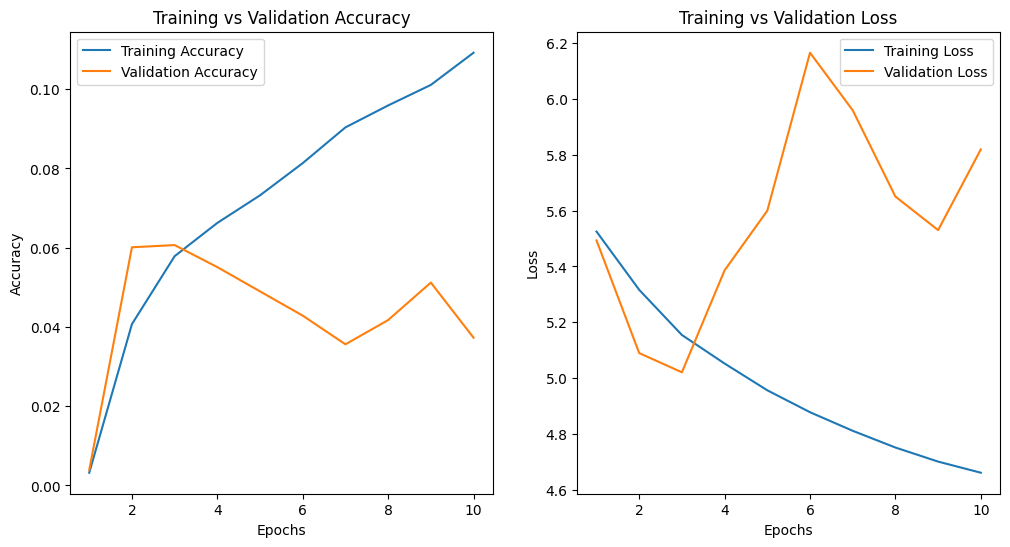

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Test Tiny com mixup

In [ ]:
batch_size = 32
image_size = (224, 224)
num_epochs = 30


preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

augment_mode='mixup'

# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)


steps_per_epoch = len(train_ds)
print(f"Number of batches per epoch: {steps_per_epoch}")

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Number of batches per epoch: 350


In [ ]:
model = build_densenet(
        layers_per_block=[4, 8, 12, 8],
        growth_rate=12,
        compression=0.5,
        dropout_rate=0.1,  # Menor dropout para baseline
        bottleneck=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
            metrics=metrics)

In [ ]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 135s 168ms/step - accuracy: 0.0513 - auc: 0.6144 - f1_macro: 0.0208 - f1_weighted: 0.0318 - loss: 5.4194 - top5_accuracy: 0.1352 - val_accuracy: 0.0506 - val_auc: 0.6458 - val_f1_macro: 0.0058 - val_f1_weighted: 0.0183 - val_loss: 5.2003 - val_top5_accuracy: 0.1102 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0588 - auc: 0.6358 - f1_macro: 0.0099 - f1_weighted: 0.0226 - loss: 5.0972 - top5_accuracy: 0.1586 - val_accuracy: 0.0161 - val_auc: 0.5563 - val_f1_macro: 0.0074 - val_f1_weighted: 0.0108 - val_loss: 6.9901 - val_top5_accuracy: 0.0668 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0698 - auc: 0.6577 - f1_macro: 0.0151 - f1_weighted: 0.0294 - loss: 4.9684 - top5_accuracy: 0.1845 - val_accuracy: 0.0278 - val_auc: 0.5969 - val_f1_macro: 0.0092 - val_f1_weighted: 0.0144 - val_loss: 6.7317 - val_top5_accuracy: 0

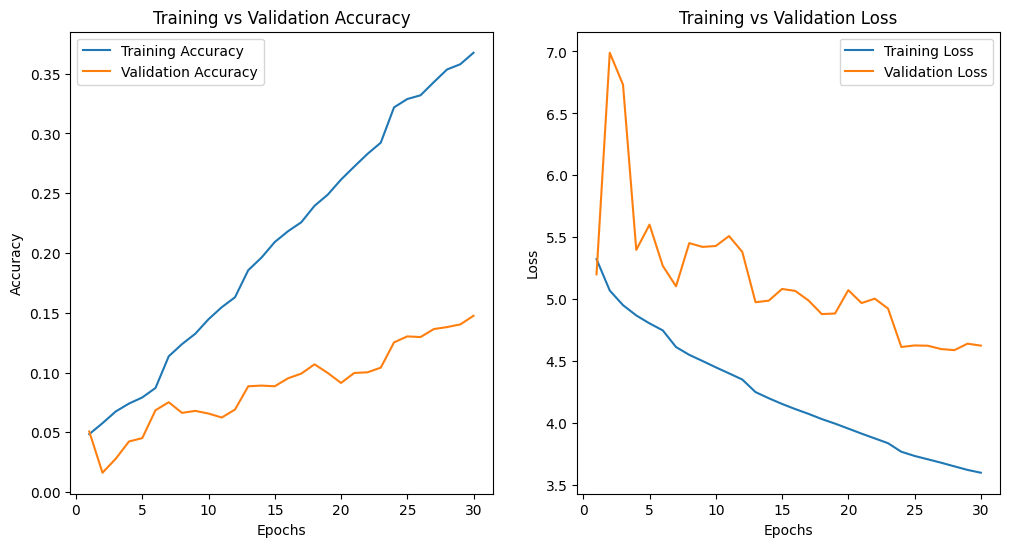

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
model.save('dense_tiny_mix.h5')

## Test Increasing DropOut

In [ ]:
model = build_densenet(
        layers_per_block=[4, 8, 12, 8],
        growth_rate=12,
        compression=0.5,
        dropout_rate=0.3,
        bottleneck=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
            metrics=metrics)

In [ ]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny_drop03",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - accuracy: 0.0709 - auc: 0.6324 - f1_macro: 0.0408 - f1_weighted: 0.0523 - loss: 5.4136 - top5_accuracy: 0.1707 - val_accuracy: 0.0501 - val_auc: 0.6580 - val_f1_macro: 0.0046 - val_f1_weighted: 0.0145 - val_loss: 5.1386 - val_top5_accuracy: 0.1575 - learning_rate: 0.0010
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.0549 - auc: 0.6340 - f1_macro: 0.0075 - f1_weighted: 0.0200 - loss: 5.1190 - top5_accuracy: 0.1556 - val_accuracy: 0.0479 - val_auc: 0.6720 - val_f1_macro: 0.0066 - val_f1_weighted: 0.0228 - val_loss: 5.1145 - val_top5_accuracy: 0.1603 - learning_rate: 0.0010
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.0641 - auc: 0.6574 - f1_macro: 0.0121 - f1_weighted: 0.0260 - loss: 4.9895 - top5_accuracy: 0.1783 - val_accuracy: 0.0595 - val_auc: 0.7119 - val_f1_macro: 0.0130 - val_f1_weighted: 0.0318 - val_loss: 4.9155 - val_top5_accuracy: 0

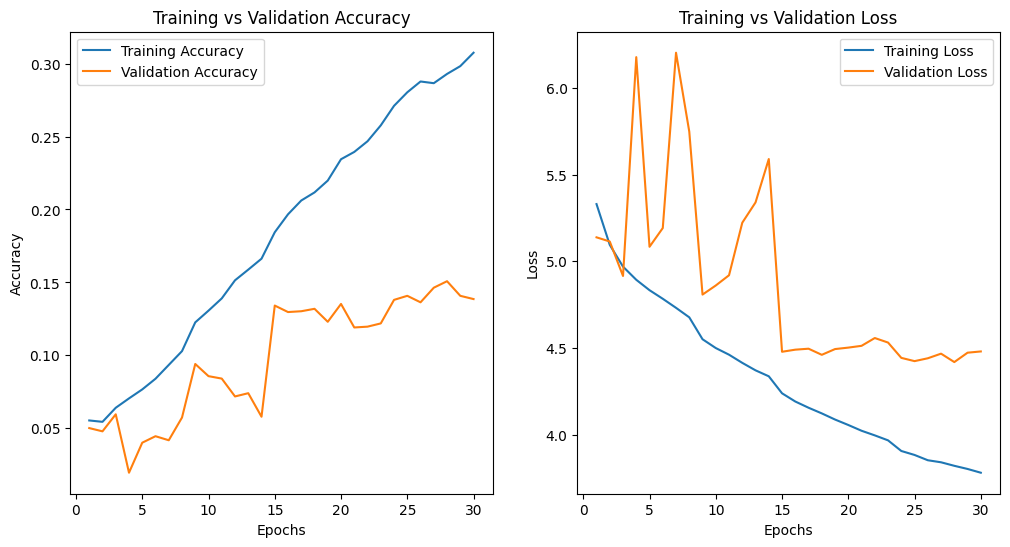

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
model.save('model.h5')

## Hyperband tunner - DenseNet S

Testing:
- Drop out (different percentages)
- Growth rate
- Compression
- l2 weights
- Activation function

In [ ]:
def dense_layer(x, growth_rate, dropout_rate, bottleneck):
    # ‑‑ Optionally add a 1×1 bottleneck (DenseNet‑B)
    if bottleneck:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(4 * growth_rate, (1, 1), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
        x1 = BatchNormalization()(x1)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
    else:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)

    if dropout_rate:                    # dropout depois do conv
        x1 = Dropout(dropout_rate)(x1)
    return Concatenate()([x, x1])       # dense connection


def dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck):
    for _ in range(n_layers):
        x = dense_layer(x, growth_rate, dropout_rate, bottleneck)
    return x


def transition_layer(x, compression, dropout_rate):
    filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same',
               kernel_regularizer=l2(1e-4))(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return AveragePooling2D((2, 2), strides=2)(x)


def build_densenet(input_shape=(224, 224, 3),
                   num_classes=202,
                   layers_per_block=(6, 12, 24, 16),
                   growth_rate=32,
                   compression=0.5,
                   bottleneck=True,
                   dropout_rate=0.3):
    inputs = Input(shape=input_shape)

    # Stem
    x = Conv2D(64, (7, 7), strides=2, padding='same',
               kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense blocks
    for i, n_layers in enumerate(layers_per_block):
        x = dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck)
        if i != len(layers_per_block) - 1:          # no transition after last
            x = transition_layer(x, compression, dropout_rate)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
from keras_tuner import Hyperband, Objective

In [ ]:
# Define OverfitStopper callback
class OverfitStopper(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.1):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        train_f1 = logs.get("f1_macro")  # adjust if your training metric has another name
        val_f1 = logs.get("val_f1_macro")
        if train_f1 is not None and val_f1 is not None:
            gap = train_f1 - val_f1
            if gap > self.threshold:
                print(f"[Early stop] Overfitting detected: train_f1={train_f1:.3f}, val_f1={val_f1:.3f}")
                self.model.stop_training = True

In [ ]:
# Model builder
def build_model_S_densenet(hp):
    growth_rate = hp.Choice('growth_rate', [12, 24, 32])
    compression = hp.Choice('compression', [0.5, 0.7, 1.0])
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.5, step=0.1)
    learning_rate = hp.Float('lr', 1e-5, 1e-2, sampling='log')
    use_extra_dense = hp.Boolean('use_extra_dense')
    head_activation = hp.Choice("head_activation", ["relu", "leaky_relu"])

    print(f"[HP] growth_rate={growth_rate}, compression={compression}, dropout={dropout_rate}, "
          f"lr={learning_rate}, extra_dense={use_extra_dense}, activation={head_activation}")

    base_model = build_densenet(
        layers_per_block=[6, 12, 24, 16],
        growth_rate=growth_rate,
        compression=compression,
        dropout_rate=dropout_rate,
        bottleneck=True
    )

    inputs = keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)

    # Head com ativação escolhida

    if use_extra_dense:
        x = layers.Dense(256)(x)
        if head_activation == 'leaky_relu':
            x = layers.LeakyReLU()(x)
        else:
            x = layers.ReLU()(x)
        x = layers.Dropout(dropout_rate)(x)  # regularização também aqui

    outputs = layers.Dense(202, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    return model

In [ ]:
# Custom tuner with augmentation and overfit control
class MyAugTuner(Hyperband):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        aug = "mixup"
        oversample = True

        train_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/train",
            minority_class=minority_class,
            augment=aug,
            oversampling=oversample,
            shuffle=True
        )

        val_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/val",
            minority_class=minority_class,
            augment=None,
            oversampling=False
        )

        model = build_model_S_densenet(hp)
        epochs = trial.hyperparameters.get('tuner/epochs')

        return model.fit(
            train_ds,
            validation_data=val_ds,
            callbacks=callbacks,
            epochs=epochs,
            verbose=1
        )

In [ ]:
# Preprocessing
batch_size = 32
image_size = (224, 224)
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

callbacks = callbacks + [OverfitStopper()]

# Tuner
tuner = MyAugTuner(
    hypermodel=build_model_S_densenet,
    objective=Objective("val_f1_macro", direction="max"),
    max_epochs=20,
    factor=3,
    directory="tuner_dir",
    project_name="densenet_S_mixup_control_overfit"
)

# Search
tuner.search(callbacks=callbacks)

Trial 15 Complete [00h 11m 59s]
val_f1_macro: 0.0017770847771316767

Best val_f1_macro So Far: 0.0017770847771316767
Total elapsed time: 02h 43m 02s

Search: Running Trial #16

Value             |Best Value So Far |Hyperparameter
12                |12                |growth_rate
0.7               |1                 |compression
0.1               |0.3               |dropout_rate
0.0098992         |2.0807e-05        |lr
False             |False             |use_extra_dense
relu              |relu              |head_activation
7                 |7                 |tuner/epochs
3                 |3                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
1                 |1                 |tuner/round
0000              |0009              |tuner/trial_id

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
[HP] growth_rate=12, compression=0.7, dropout=0.1, lr=0.009899233148540992, extra_dense=False, activation=relu
Epoch 1/

In [ ]:
# Retrieve the top N trials and print their results
top_n = 10
top_hps = tuner.get_best_hyperparameters(top_n)

for i, hp in enumerate(top_hps):
    matched_trial = None
    for trial in tuner.oracle.trials.values():
        if trial.hyperparameters.values == hp.values:
            matched_trial = trial
            break

    if matched_trial is None:
        print(f"\n No trial found for top {i+1}")
        continue

    print(f"\n🔹 Top {i+1} trial (Score: {matched_trial.score:.4f}):")

    print("  Growth Rate:", hp.get("growth_rate"))
    print("  Compression:", hp.get("compression"))
    print("  Dropout Rate:", hp.get("dropout_rate"))
    print("  Learning Rate:", hp.get("lr"))
    print("  Extra Dense:", hp.get("use_extra_dense"))
    print("  Head Activation:", hp.get("head_activation"))


## Hyperband Tuner - Tiny Dense Net

In [22]:
def dense_layer(x, growth_rate, dropout_rate, bottleneck):
    # ‑‑ Optionally add a 1×1 bottleneck (DenseNet‑B)
    if bottleneck:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(4 * growth_rate, (1, 1), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
        x1 = BatchNormalization()(x1)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)
    else:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(1e-4))(x1)

    if dropout_rate:                    # dropout depois do conv
        x1 = Dropout(dropout_rate)(x1)
    return Concatenate()([x, x1])       # dense connection


def dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck):
    for _ in range(n_layers):
        x = dense_layer(x, growth_rate, dropout_rate, bottleneck)
    return x


def transition_layer(x, compression, dropout_rate):
    filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same',
               kernel_regularizer=l2(1e-4))(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return AveragePooling2D((2, 2), strides=2)(x)


def build_densenet(input_shape=(224, 224, 3),
                   num_classes=202,
                   layers_per_block=(6, 12, 24, 16),
                   growth_rate=32,
                   compression=0.5,
                   bottleneck=True,
                   dropout_rate=0.3):
    inputs = Input(shape=input_shape)

    # Stem
    x = Conv2D(64, (7, 7), strides=2, padding='same',
               kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense blocks
    for i, n_layers in enumerate(layers_per_block):
        x = dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck)
        if i != len(layers_per_block) - 1:          # no transition after last
            x = transition_layer(x, compression, dropout_rate)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

In [23]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [24]:
from keras_tuner import Hyperband, Objective

In [25]:
# Define OverfitStopper callback
class OverfitStopper(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.1):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        train_f1 = logs.get("f1_macro")  # adjust if your training metric has another name
        val_f1 = logs.get("val_f1_macro")
        if train_f1 is not None and val_f1 is not None:
            gap = train_f1 - val_f1
            if gap > self.threshold:
                print(f"[Early stop] Overfitting detected: train_f1={train_f1:.3f}, val_f1={val_f1:.3f}")
                self.model.stop_training = True

In [32]:
# Model builder
def build_model_tiny_densenet(hp):

    growth_rate = hp.Choice('growth_rate', [8, 12, 16])
    compression = hp.Choice('compression', [0.4, 0.5, 0.6])
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[5e-4, 1e-4])
    label_smoothing = hp.Choice('label_smoothing', [0.0, 0.05, 0.1])

    print(f"[HP] growth_rate={growth_rate}, compression={compression}, dropout={dropout_rate}, "
          f"lr={learning_rate}, label_smothing={label_smoothing}")



    base_model = build_densenet(
        layers_per_block=[4, 8, 12, 8],
        growth_rate=growth_rate,
        compression=compression,
        dropout_rate=dropout_rate,
        bottleneck=False
    )

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    base_model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
        metrics=metrics
    )

    return base_model


In [33]:
# Custom tuner with augmentation and overfit control
class MyAugTuner(Hyperband):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        aug = "mixup"
        oversample = True

        train_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/train",
            minority_class=minority_class,
            augment=aug,
            oversampling=oversample,
            shuffle=True
        )

        val_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/val",
            minority_class=minority_class,
            augment=None,
            oversampling=False
        )

        model = build_model_tiny_densenet(hp)
        epochs = trial.hyperparameters.get('tuner/epochs')

        return model.fit(
            train_ds,
            validation_data=val_ds,
            callbacks=callbacks,
            epochs=epochs,
            verbose=1
        )

In [34]:
# Preprocessing
batch_size = 32
image_size = (224, 224)
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

callbacks = callbacks + [OverfitStopper()]

# Tuner
tuner = MyAugTuner(
    hypermodel=build_model_tiny_densenet,
    objective=Objective("val_f1_macro", direction="max"),
    max_epochs=20,
    factor=3,
    directory="tuner_dir",
    project_name="densenet_tiny_mixup_control_overfit_tuner"
)

# Search
tuner.search(callbacks=callbacks)

Trial 30 Complete [00h 09m 28s]
val_f1_macro: 0.025979025289416313

Best val_f1_macro So Far: 0.04569309949874878
Total elapsed time: 02h 47m 32s


In [36]:
# Retrieve the top N trials and print their results
top_n = 10
top_hps = tuner.get_best_hyperparameters(top_n)

for i, hp in enumerate(top_hps):
    matched_trial = None
    for trial in tuner.oracle.trials.values():
        if trial.hyperparameters.values == hp.values:
            matched_trial = trial
            break

    if matched_trial is None:
        print(f"\n No trial found for top {i+1}")
        continue

    print(f"\n🔹 Top {i+1} trial (Score: {matched_trial.score:.4f}):")

    print("  Growth Rate:", hp.get("growth_rate"))
    print("  Compression:", hp.get("compression"))
    print("  Dropout Rate:", hp.get("dropout_rate"))
    print("  Learning Rate:", hp.get("learning_rate"))
    print("  Label Smoothing:", hp.get("label_smoothing"))


🔹 Top 1 trial (Score: 0.0457):
  Growth Rate: 8
  Compression: 0.4
  Dropout Rate: 0.30000000000000004
  Learning Rate: 0.0005
  Label Smoothing: 0.0

🔹 Top 2 trial (Score: 0.0456):
  Growth Rate: 12
  Compression: 0.5
  Dropout Rate: 0.30000000000000004
  Learning Rate: 0.0001
  Label Smoothing: 0.0

🔹 Top 3 trial (Score: 0.0420):
  Growth Rate: 16
  Compression: 0.4
  Dropout Rate: 0.2
  Learning Rate: 0.0005
  Label Smoothing: 0.05

🔹 Top 4 trial (Score: 0.0360):
  Growth Rate: 8
  Compression: 0.4
  Dropout Rate: 0.30000000000000004
  Learning Rate: 0.0005
  Label Smoothing: 0.0

🔹 Top 5 trial (Score: 0.0311):
  Growth Rate: 8
  Compression: 0.5
  Dropout Rate: 0.2
  Learning Rate: 0.0005
  Label Smoothing: 0.0

🔹 Top 6 trial (Score: 0.0280):
  Growth Rate: 8
  Compression: 0.5
  Dropout Rate: 0.30000000000000004
  Learning Rate: 0.0001
  Label Smoothing: 0.0

🔹 Top 7 trial (Score: 0.0260):
  Growth Rate: 8
  Compression: 0.4
  Dropout Rate: 0.30000000000000004
  Learning Rate: 0.

## DenseNet S after Hyperband - 30 epochs

In [ ]:
model=build_densenet(
    layers_per_block=[6, 12, 24, 16],
    growth_rate=12,
    compression=1,
    dropout_rate=0.3,
    bottleneck=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2.0807e-05),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
        metrics=metrics)

In [ ]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 30
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [ ]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_S_test1",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 782s 2s/step - accuracy: 0.0185 - auc: 0.5399 - f1_macro: 0.0020 - f1_weighted: 0.0058 - loss: 6.0166 - top5_accuracy: 0.0639 - val_accuracy: 0.0345 - val_auc: 0.5975 - val_f1_macro: 0.0021 - val_f1_weighted: 0.0099 - val_loss: 5.8590 - val_top5_accuracy: 0.1196 - learning_rate: 2.0807e-05
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 176ms/step - accuracy: 0.0579 - auc: 0.6214 - f1_macro: 0.0036 - f1_weighted: 0.0129 - loss: 5.7835 - top5_accuracy: 0.1393 - val_accuracy: 0.0607 - val_auc: 0.6770 - val_f1_macro: 0.0051 - val_f1_weighted: 0.0208 - val_loss: 5.6214 - val_top5_accuracy: 0.1758 - learning_rate: 2.0807e-05
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 177ms/step - accuracy: 0.0599 - auc: 0.6370 - f1_macro: 0.0040 - f1_weighted: 0.0137 - loss: 5.7276 - top5_accuracy: 0.1507 - val_accuracy: 0.0634 - val_auc: 0.6982 - val_f1_macro: 0.0089 - val_f1_weighted: 0.0251 - val_loss: 5.5609 - val_top5_accu

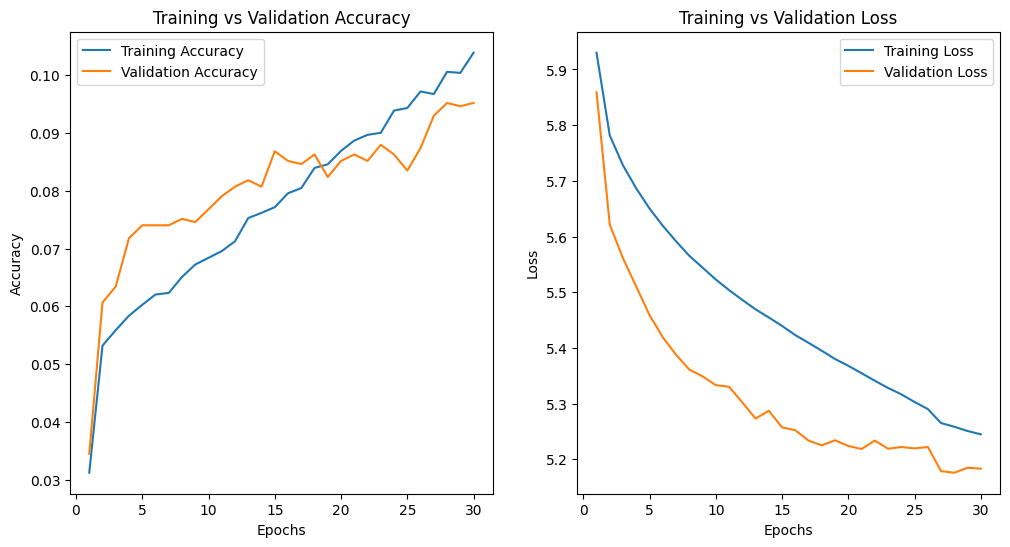

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
model.save('densenet_s_test1.h5')

## DenseNet S after Hyperband - 100 epochs


In [64]:
model=build_densenet(
    layers_per_block=[6, 12, 24, 16],
    growth_rate=12,
    compression=1,
    dropout_rate=0.3,
    bottleneck=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2.0807e-05),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
        metrics=metrics)

In [65]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 100
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [66]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_S_test2",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 345s 321ms/step - accuracy: 0.0447 - auc: 0.6061 - f1_macro: 0.0175 - f1_weighted: 0.0293 - loss: 5.9854 - top5_accuracy: 0.1279 - val_accuracy: 0.0323 - val_auc: 0.6052 - val_f1_macro: 0.0028 - val_f1_weighted: 0.0127 - val_loss: 5.8531 - val_top5_accuracy: 0.1029 - learning_rate: 2.0807e-05
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 66s 187ms/step - accuracy: 0.0560 - auc: 0.6200 - f1_macro: 0.0043 - f1_weighted: 0.0136 - loss: 5.7405 - top5_accuracy: 0.1484 - val_accuracy: 0.0735 - val_auc: 0.6973 - val_f1_macro: 0.0071 - val_f1_weighted: 0.0239 - val_loss: 5.5440 - val_top5_accuracy: 0.1925 - learning_rate: 2.0807e-05
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 65s 186ms/step - accuracy: 0.0599 - auc: 0.6367 - f1_macro: 0.0063 - f1_weighted: 0.0168 - loss: 5.6595 - top5_accuracy: 0.1617 - val_accuracy: 0.0801 - val_auc: 0.7161 - val_f1_macro: 0.0115 - val_f1_weighted: 0.0333 - val_loss: 5.4647 - val_top

In [67]:
model.save('densenet_s_test2_100epc.h5')

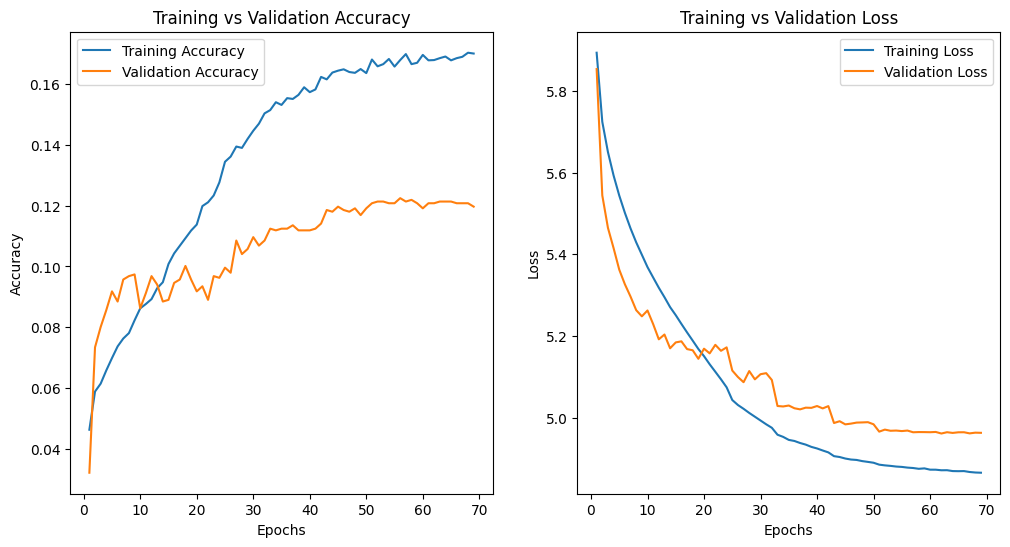

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



## 1st DenseNet Tiny after hyperband

In [38]:
model=build_densenet(
    layers_per_block=[4, 8, 12, 8],
    growth_rate=8,
    compression=0.4,
    dropout_rate=0.3,
    bottleneck=False
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
        metrics=metrics)

In [39]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 100
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [40]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny_test1",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 145s 178ms/step - accuracy: 0.0610 - auc: 0.6260 - f1_macro: 0.0133 - f1_weighted: 0.0263 - loss: 5.2764 - top5_accuracy: 0.1511 - val_accuracy: 0.0646 - val_auc: 0.6890 - val_f1_macro: 0.0062 - val_f1_weighted: 0.0223 - val_loss: 4.9673 - val_top5_accuracy: 0.1703 - learning_rate: 5.0000e-04
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.0617 - auc: 0.6391 - f1_macro: 0.0065 - f1_weighted: 0.0170 - loss: 5.0399 - top5_accuracy: 0.1600 - val_accuracy: 0.0534 - val_auc: 0.6751 - val_f1_macro: 0.0060 - val_f1_weighted: 0.0189 - val_loss: 5.0636 - val_top5_accuracy: 0.1658 - learning_rate: 5.0000e-04
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.0683 - auc: 0.6546 - f1_macro: 0.0104 - f1_weighted: 0.0227 - loss: 4.9580 - top5_accuracy: 0.1757 - val_accuracy: 0.0618 - val_auc: 0.6649 - val_f1_macro: 0.0125 - val_f1_weighted: 0.0339 - val_loss: 5.1933 - val_top5_

In [43]:
model.save('densenet_tiny_test1.keras')

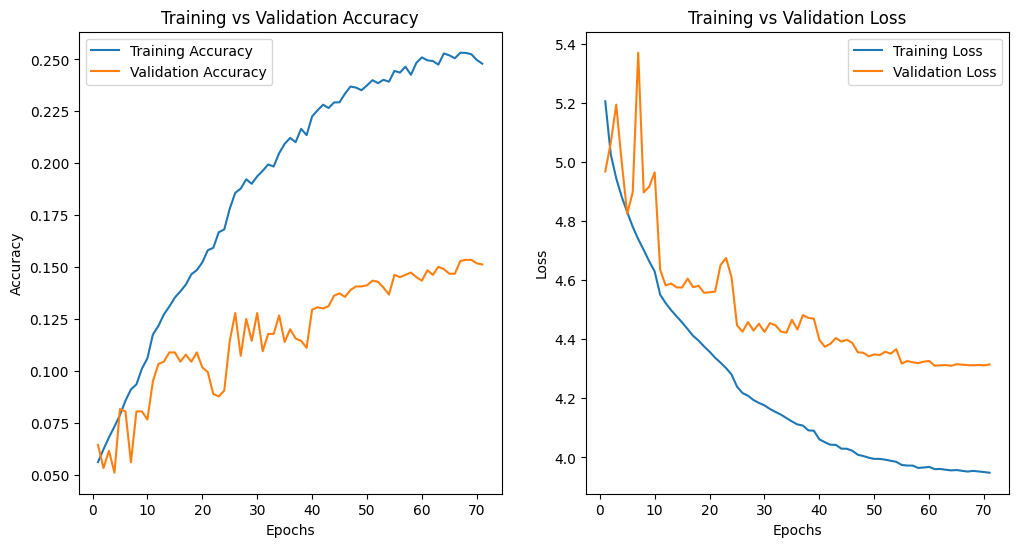

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 2nd DenseNet tiny after hyperband

In [44]:
model=build_densenet(
    layers_per_block=[4, 8, 12, 8],
    growth_rate=12,
    compression=0.5,
    dropout_rate=0.3,
    bottleneck=False
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
        metrics=metrics)

In [45]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 100
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [46]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny_test2",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 151s 187ms/step - accuracy: 0.0758 - auc: 0.6346 - f1_macro: 0.0377 - f1_weighted: 0.0545 - loss: 5.3324 - top5_accuracy: 0.1749 - val_accuracy: 0.0406 - val_auc: 0.6308 - val_f1_macro: 0.0036 - val_f1_weighted: 0.0162 - val_loss: 5.2017 - val_top5_accuracy: 0.1447 - learning_rate: 1.0000e-04
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0619 - auc: 0.6315 - f1_macro: 0.0054 - f1_weighted: 0.0167 - loss: 5.1092 - top5_accuracy: 0.1600 - val_accuracy: 0.0651 - val_auc: 0.6874 - val_f1_macro: 0.0083 - val_f1_weighted: 0.0211 - val_loss: 5.0038 - val_top5_accuracy: 0.1886 - learning_rate: 1.0000e-04
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.0673 - auc: 0.6487 - f1_macro: 0.0080 - f1_weighted: 0.0206 - loss: 5.0119 - top5_accuracy: 0.1827 - val_accuracy: 0.0651 - val_auc: 0.7083 - val_f1_macro: 0.0116 - val_f1_weighted: 0.0281 - val_loss: 4.9298 - val_top5_

In [47]:
model.save('densenet_tiny_test2.keras')

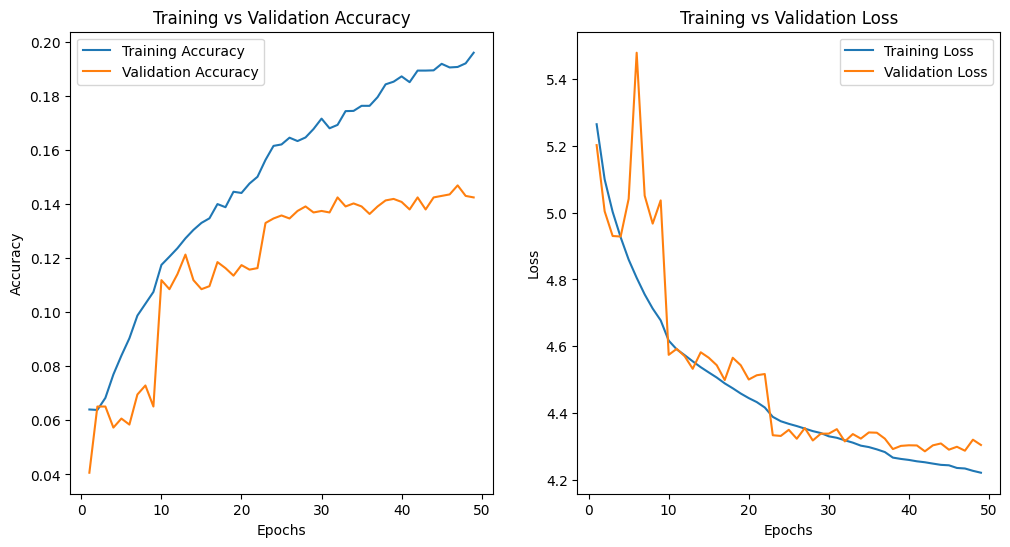

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 3rd Dense Net Tiny after hyperband

In [49]:
model=build_densenet(
    layers_per_block=[4, 8, 12, 8],
    growth_rate=16,
    compression=0.4,
    dropout_rate=0.2,
    bottleneck=False
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=metrics)

In [50]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 100
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [51]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny_test3",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 150s 186ms/step - accuracy: 0.0747 - auc: 0.6348 - f1_macro: 0.0312 - f1_weighted: 0.0458 - loss: 5.4032 - top5_accuracy: 0.1791 - val_accuracy: 0.0378 - val_auc: 0.6206 - val_f1_macro: 0.0031 - val_f1_weighted: 0.0111 - val_loss: 5.4078 - val_top5_accuracy: 0.1107 - learning_rate: 5.0000e-04
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.0572 - auc: 0.6365 - f1_macro: 0.0090 - f1_weighted: 0.0206 - loss: 5.1452 - top5_accuracy: 0.1583 - val_accuracy: 0.0289 - val_auc: 0.6071 - val_f1_macro: 0.0056 - val_f1_weighted: 0.0105 - val_loss: 6.2608 - val_top5_accuracy: 0.1085 - learning_rate: 5.0000e-04
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.0682 - auc: 0.6546 - f1_macro: 0.0152 - f1_weighted: 0.0285 - loss: 5.0232 - top5_accuracy: 0.1869 - val_accuracy: 0.0562 - val_auc: 0.6717 - val_f1_macro: 0.0176 - val_f1_weighted: 0.0313 - val_loss: 5.3343 - val_top5_

In [52]:
model.save('densenet_tiny_test3.keras')

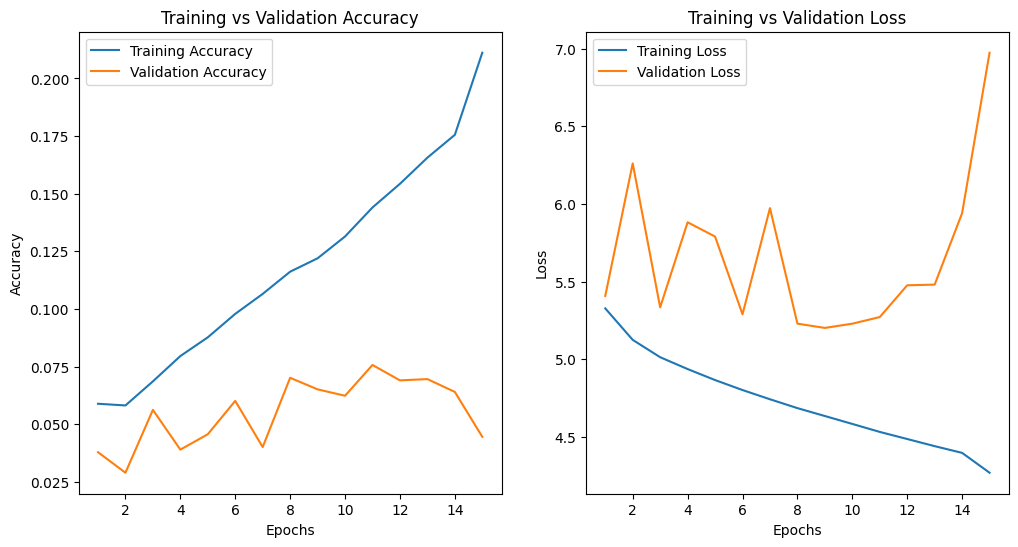

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 2nd best with bottleneck

In [54]:
model=build_densenet(
    layers_per_block=[4, 8, 12, 8],
    growth_rate=12,
    compression=0.5,
    dropout_rate=0.3,
    bottleneck=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.0),
        metrics=metrics)

In [55]:
# Hiperparâmetros
batch_size = 32
image_size = (224, 224)
num_epochs = 100
augment_mode = "mixup"

# Preprocessador
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
all_results = []


# Carregamento dos datasets
train_ds, class_names = preprocess.load_img(
    data_dir="data/rare_species/train",
    minority_class=minority_class,
    augment=augment_mode if augment_mode != "none" else None,
    oversampling=True,
    shuffle=True
)

val_ds, _ = preprocess.load_img(
    data_dir="data/rare_species/val",
    minority_class=minority_class,
    augment=None,
    oversampling=False
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


In [56]:
# Experimento
experiment = Experiment(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    experiment_name=f"densenet_mix_tiny_test2_bottleneck",
    batch_size=batch_size,
    image_size=image_size,
    save_model=False
)

history = experiment.run_experiment(
    callbacks=callbacks,
    epochs=num_epochs
)

No checkpoint found, starting from scratch.
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 201s 198ms/step - accuracy: 0.0364 - auc: 0.5910 - f1_macro: 0.0114 - f1_weighted: 0.0201 - loss: 5.5552 - top5_accuracy: 0.1065 - val_accuracy: 0.0334 - val_auc: 0.6361 - val_f1_macro: 0.0020 - val_f1_weighted: 0.0082 - val_loss: 5.4085 - val_top5_accuracy: 0.1347 - learning_rate: 1.0000e-04
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - accuracy: 0.0634 - auc: 0.6218 - f1_macro: 0.0044 - f1_weighted: 0.0146 - loss: 5.3551 - top5_accuracy: 0.1524 - val_accuracy: 0.0768 - val_auc: 0.6956 - val_f1_macro: 0.0113 - val_f1_weighted: 0.0326 - val_loss: 5.1461 - val_top5_accuracy: 0.2081 - learning_rate: 1.0000e-04
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - accuracy: 0.0636 - auc: 0.6396 - f1_macro: 0.0052 - f1_weighted: 0.0161 - loss: 5.2668 - top5_accuracy: 0.1684 - val_accuracy: 0.0690 - val_auc: 0.6924 - val_f1_macro: 0.0106 - val_f1_weighted: 0.0279 - val_loss: 5.1687 - val_top5_

In [57]:
model.save('densenet_tiny_test2_bottleneck.keras')

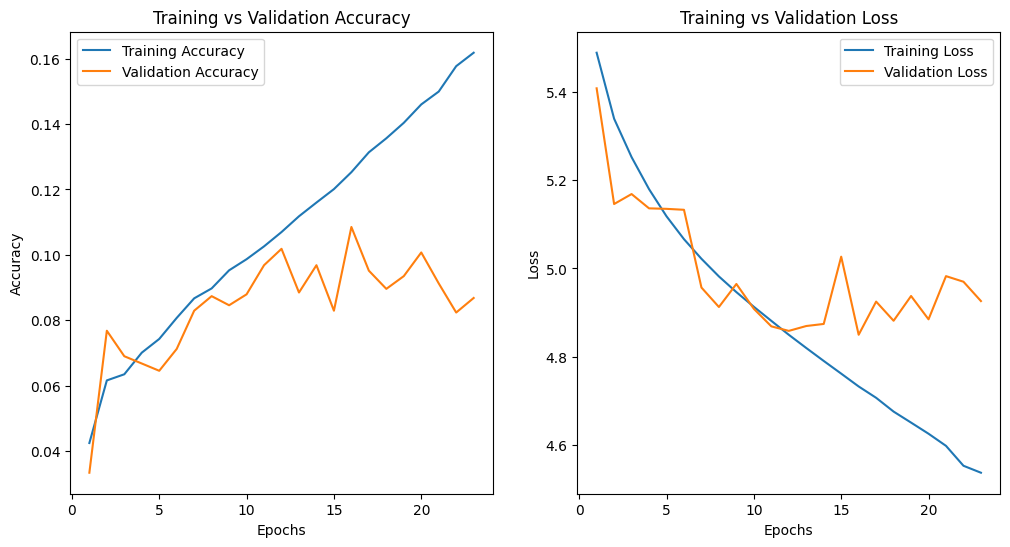

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plotting Training and Validation Accuracy and Loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Hyperband Generalistic

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras_tuner import Hyperband, Objective

In [ ]:
def dense_layer(x, growth_rate, dropout_rate, bottleneck, l2_weight=1e-4):
    # ‑‑ Optionally add a 1×1 bottleneck (DenseNet‑B)
    if bottleneck:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(4 * growth_rate, (1, 1), padding='same',
                    kernel_regularizer=l2(l2_weight))(x1)
        x1 = BatchNormalization()(x1)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(l2_weight))(x1)
    else:
        x1 = BatchNormalization()(x)
        x1 = ReLU()(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same',
                    kernel_regularizer=l2(l2_weight))(x1)

    if dropout_rate:                    # dropout depois do conv
        x1 = Dropout(dropout_rate)(x1)
    return Concatenate()([x, x1])       # dense connection


def dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck):
    for _ in range(n_layers):
        x = dense_layer(x, growth_rate, dropout_rate, bottleneck)
    return x


def transition_layer(x, compression, dropout_rate, l2_weight=1e-4):
    filters = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same',
               kernel_regularizer=l2(l2_weight))(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return AveragePooling2D((2, 2), strides=2)(x)


def build_densenet(input_shape=(224, 224, 3),
                   num_classes=202,
                   layers_per_block=(6, 12, 24, 16),
                   growth_rate=32,
                   compression=0.5,
                   bottleneck=True,
                   dropout_rate=0.3,
                   l2_weight=1e-4):
    inputs = Input(shape=input_shape)

    # Stem
    x = Conv2D(64, (7, 7), strides=2, padding='same',
               kernel_regularizer=l2(l2_weight))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense blocks
    for i, n_layers in enumerate(layers_per_block):
        x = dense_block(x, n_layers, growth_rate, dropout_rate, bottleneck)
        if i != len(layers_per_block) - 1:          # no transition after last
            x = transition_layer(x, compression, dropout_rate, l2_weight)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

In [ ]:
# Define OverfitStopper callback
class OverfitStopper(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.1):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        train_f1 = logs.get("f1_macro")  # adjust if your training metric has another name
        val_f1 = logs.get("val_f1_macro")
        if train_f1 is not None and val_f1 is not None:
            gap = train_f1 - val_f1
            if gap > self.threshold:
                print(f"[Early stop] Overfitting detected: train_f1={train_f1:.3f}, val_f1={val_f1:.3f}")
                self.model.stop_training = True

In [ ]:
def build_model_densenet(hp):
    block_config_key = hp.Choice('layers_per_block', ['tiny', 'standard'])

    # Decode layers per block manually
    if block_config_key == 'tiny':
        layers_per_block = [4, 8, 12, 8]
    else:
        layers_per_block = [6, 12, 24, 16]

    growth_rate = hp.Choice('growth_rate', [8, 12, 16, 24])
    compression = hp.Choice('compression', [0.5, 0.7])
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.4, step=0.1)
    l2_weight = hp.Choice('l2_weight', [1e-5, 1e-4, 5e-4])
    learning_rate = hp.Float('lr', 1e-5, 1e-2, sampling='log')
    label_smoothing = hp.Choice('label_smoothing', [0.0, 0.05, 0.1])
    optimizer_key = hp.Choice('optimizer', ['sgd', 'adam', 'adamw'])

    print(f"[HP] layers_per_block={layers_per_block}, growth_rate={growth_rate}, compression={compression}, "
          f"dropout={dropout_rate}, l2_weight={l2_weight}, lr={learning_rate}, "
          f"label_smoothing={label_smoothing}, optimizer={optimizer_key}")

    # Build base model
    base_model = build_densenet(
        layers_per_block=layers_per_block,
        growth_rate=growth_rate,
        compression=compression,
        dropout_rate=dropout_rate,
        bottleneck=True,
        l2_weight=l2_weight
    )

    # Select optimizer based on hyperparameter
    if optimizer_key == 'sgd':
        optimizer = tf.keras.optimizers.SGD(
            learning_rate=learning_rate,
            momentum=0.9,
            nesterov=True
        )
    elif optimizer_key == 'adamw':
        optimizer = tf.keras.optimizers.AdamW(
            learning_rate=learning_rate,
            weight_decay=l2_weight
        )
    else:  # 'adam'
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=learning_rate
        )

    # Compile the model
    base_model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
        metrics=metrics
    )

    return base_model


In [ ]:
# Custom tuner with augmentation and overfit control
class MyAugTuner(Hyperband):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        aug = "mixup"
        oversample = True

        train_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/train",
            minority_class=minority_class,
            augment=aug,
            oversampling=oversample,
            shuffle=True
        )

        val_ds, _ = preprocess.load_img(
            data_dir="data/rare_species/val",
            minority_class=minority_class,
            augment=None,
            oversampling=False
        )

        model = build_model_densenet(hp)
        epochs = trial.hyperparameters.get('tuner/epochs')

        return model.fit(
            train_ds,
            validation_data=val_ds,
            callbacks=callbacks,
            epochs=epochs,
            verbose=1
        )

In [ ]:
# Preprocessing
batch_size = 32
image_size = (224, 224)
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

callbacks = callbacks + [OverfitStopper()]

# Tuner
tuner = MyAugTuner(
    hypermodel=build_model_densenet,
    objective=Objective("val_f1_macro", direction="max"),
    max_epochs=20,
    factor=3,
    directory="tuner_dir",
    project_name="densenet_mixup_tuner"
)

# Search
tuner.search(callbacks=callbacks)

Trial 30 Complete [00h 12m 44s]
val_f1_macro: 0.028496943414211273

Best val_f1_macro So Far: 0.05570363625884056
Total elapsed time: 10h 00m 09s


In [ ]:
tuner = MyAugTuner(
    hypermodel=build_model_densenet,
    objective=Objective('val_f1_macro', direction='max'),  # ou o objetivo que estavas a usar
    max_epochs=20,
    factor=3,
    directory='tuner_dir',  # <<<<<< Caminho para onde estavas a salvar
    project_name='densenet_mixup_tuner'  # <<<<<< Project name correto
)

Reloading Tuner from tuner_dir/densenet_mixup_tuner/tuner0.json


In [ ]:
tuner.reload()
tuner.results_summary()

Results summary
Results in tuner_dir/densenet_mixup_tuner
Showing 10 best trials
Objective(name="val_f1_macro", direction="max")

Trial 0025 summary
Hyperparameters:
layers_per_block: tiny
growth_rate: 8
compression: 0.7
dropout_rate: 0.30000000000000004
l2_weight: 1e-05
lr: 0.0014961596596660366
label_smoothing: 0.05
optimizer: adamw
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.05570363625884056

Trial 0016 summary
Hyperparameters:
layers_per_block: standard
growth_rate: 12
compression: 0.7
dropout_rate: 0.2
l2_weight: 0.0001
lr: 0.0013928814293784045
label_smoothing: 0.05
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.05158236622810364

Trial 0024 summary
Hyperparameters:
layers_per_block: standard
growth_rate: 24
compression: 0.7
dropout_rate: 0.4
l2_weight: 0.0005
lr: 0.0003507408885598726
label_smoothing: 0.0
optimizer: adamw
tuner/epochs: 20
tuner/initia

In [ ]:
# Retrieve the top N trials and print their results
top_n = 10
top_hps = tuner.get_best_hyperparameters(top_n)

for i, hp in enumerate(top_hps):
    matched_trial = None
    for trial in tuner.oracle.trials.values():
        if trial.hyperparameters.values == hp.values:
            matched_trial = trial
            break

    if matched_trial is None:
        print(f"\n No trial found for top {i+1}")
        continue

    print(f"\n🔹 Top {i+1} trial (Score: {matched_trial.score:.4f}):")

    print("  Growth Rate:", hp.get("growth_rate"))
    print("  Compression:", hp.get("compression"))
    print("  Dropout Rate:", hp.get("dropout_rate"))
    print("  Learning Rate:", hp.get("lr"))
    print("  Extra Dense:", hp.get("use_extra_dense"))
    print("  Head Activation:", hp.get("head_activation"))


NameError: name 'tuner' is not defined